In [1]:
import networkx as nx
import sympy as sp

sp.init_printing()

from index_reduction import IndexReduction, draw_graph

%load_ext autoreload
%autoreload 2

In [2]:
def pprint(exprs, heading="expressions"):
    print(heading)
    for expr in exprs:
        display(expr)

In [3]:
# Define the symbol for time
t = sp.symbols("t")

# Define symbols
L = sp.symbols("L")
g = sp.Function("g")(t)  # make g time-varying for testing a time-varying parameter

# Define functions of time
x = sp.Function("x")(t)
y = sp.Function("y")(t)
w = sp.Function("w")(t)
z = sp.Function("z")(t)
T = sp.Function("T")(t)

# knowns
knowns = [L, g]

# Define the derivatives of these functions with respect to time
xdot = x.diff(t)
ydot = y.diff(t)
wdot = w.diff(t)
zdot = z.diff(t)

# Define equations
eq0 = xdot - w
eq1 = ydot - z
eq2 = wdot - T * x
eq3 = zdot - T * y + g
eq4 = x**2 + y**2 - L**2

# Equations list
eqs = [eq0, eq1, eq2, eq3, eq4]

# pprint(eqs, "Equations")

In [4]:
ir = IndexReduction(t, eqs, knowns, notebook=True)

In [5]:
ir.x

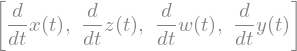

In [6]:
ir.x_dot

In [7]:
ir.y

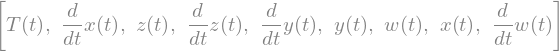

In [8]:
ir.X

In [9]:
ir.A

[None, None, 3, None, None, 4, 8, 1, None]

In [10]:
ir.M

In [11]:
ir.N

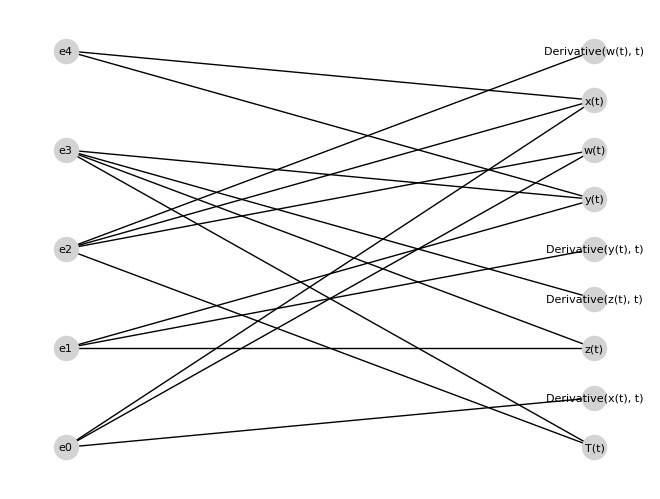

In [12]:
draw_graph(ir.G)

In [13]:
ir.pantelides()

# Panteides Algorithm Completed 

Total equations (before|after): 5|9
Total variables (before|after): 9|11


Variables 

[T(t), Derivative(x(t), t), z(t), Derivative(z(t), t), Derivative(y(t), t), y(t), w(t), x(t), Derivative(w(t), t), Derivative(x(t), (t, 2)), Derivative(y(t), (t, 2))]


Equations 

-w(t) + Derivative(x(t), t)
-z(t) + Derivative(y(t), t)
-T(t)*x(t) + Derivative(w(t), t)
-T(t)*y(t) + g(t) + Derivative(z(t), t)
-L**2 + x(t)**2 + y(t)**2
2*x(t)*Derivative(x(t), t) + 2*y(t)*Derivative(y(t), t)
-Derivative(w(t), t) + Derivative(x(t), (t, 2))
Derivative(y(t), (t, 2)) - Derivative(z(t), t)
2*x(t)*Derivative(x(t), (t, 2)) + 2*y(t)*Derivative(y(t), (t, 2)) + 2*Derivative(x(t), t)**2 + 2*Derivative(y(t), t)**2


# Variable assignments
Variable T(t) is assigned to -> e2
Variable Derivative(x(t), t) is assigned to -> e0
Variable z(t) is assigned to -> 
Variable Derivative(z(t), t) is assigned to -> e3
Variable Derivative(y(t), t) is assigned to -> e1
Variable y(t) is assigned to 

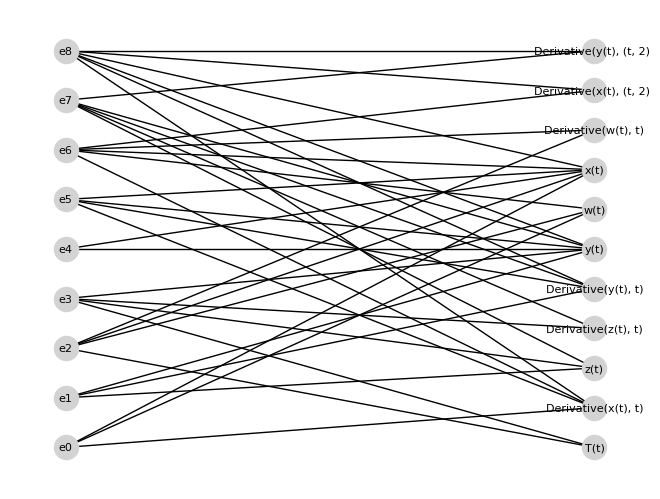

In [14]:
draw_graph(ir.G)

In [15]:
ir.make_BLT_graph()

equation e2 is matched to variable v0
and contains the following variables: {x(t), Derivative(w(t), t), T(t)}
with indices: [7, 8, 0] 

equation e3 is matched to variable v3
and contains the following variables: {y(t), Derivative(z(t), t), T(t)}
with indices: [5, 3, 0] 

equation e6 is matched to variable v8
and contains the following variables: {Derivative(w(t), t), Derivative(x(t), (t, 2))}
with indices: [8, 9] 

equation e7 is matched to variable v10
and contains the following variables: {Derivative(z(t), t), Derivative(y(t), (t, 2))}
with indices: [3, 10] 

equation e8 is matched to variable v9
and contains the following variables: {Derivative(x(t), t), Derivative(y(t), (t, 2)), Derivative(x(t), (t, 2)), Derivative(y(t), t)}
with indices: [1, 10, 9, 4] 

BLT equation ordering
['e2', 'e3', 'e6', 'e7', 'e8']
BLT variable ordering
[T(t), Derivative(z(t), t), Derivative(w(t), t), Derivative(y(t), (t, 2)), Derivative(x(t), (t, 2))]


In [16]:
ir.dummy_derivatives()

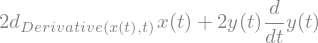

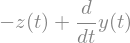

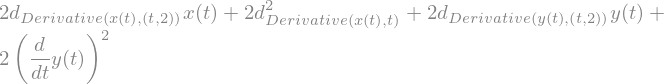

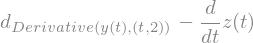

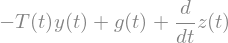

In [17]:
for eq in ir.final_dae_eqs:
    display(eq)